# **Digit Recognizer**
Learn computer vision fundamentals with the famous MNIST data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Dataset Description**

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:

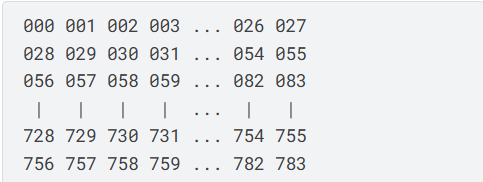

The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

Your submission file should be in the following format: For each of the 28000 images in the test set, output a single line containing the ImageId and the digit you predict. For example, if you predict that the first image is of a 3, the second image is of a 7, and the third image is of a 8, then your submission file would look like:

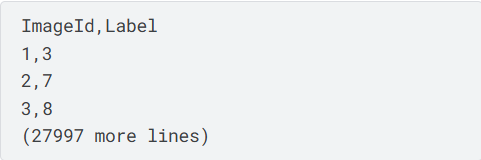

The evaluation metric for this contest is the categorization accuracy, or the proportion of test images that are correctly classified. For example, a categorization accuracy of 0.97 indicates that you have correctly classified all but 3% of the images.

# **Solution** 😃

**1. Importing Libraries**

In [ ]:
# Import necessary libraries
import numpy as np  # For numerical computations
import pandas as pd  # For handling datasets
from matplotlib import pyplot as plt # For visualization

**2. Loading the Training Dataset**

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/dataset/train.csv") # Read the CSV file into a DataFrame
dataset.head() # Display the first few rows of the dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**3. Visualizing a Random 10x10 Matrix**

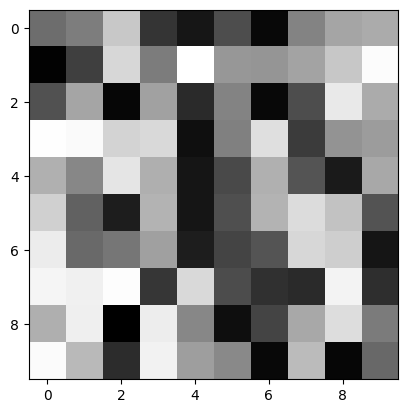

In [ ]:
a = np.random.random((10,10)) # Create a 10x10 matrix with random values between 0 and 1
plt.figure() # Create a new figure
plt.imshow(a, cmap='gray') # Display the matrix as a grayscale image
plt.show() # Show the plot

**4. Preparing the Data**

In [ ]:
# Prepare the data
data = dataset.values[:5000] # Convert the DataFrame to a NumPy array and take the first 5000 rows
data.shape # Print the shape of the data (5000 rows, 785 columns)

(5000, 785)

**5. Splitting Data into Features (X) and Labels (y)**

In [ ]:
# Split the data into features (X) and labels (y)
X, y = data[:,1:], data[:, 0] # X contains pixel values (all columns except the first), y contains labels (first column)

**6. Visualizing a Digit**

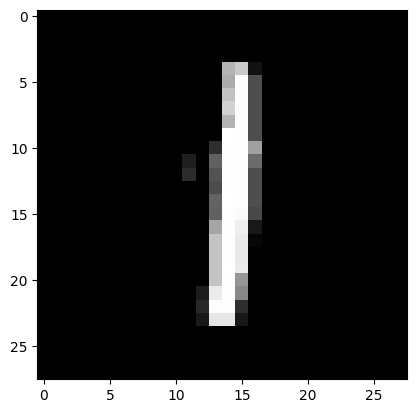

In [ ]:
# Visualize a specific digit from the dataset
im = X[497].reshape((28,28)) # Reshape the 784-pixel array into a 28x28 matrix
plt.figure() # Create a new figure
plt.imshow(im, cmap='gray') # Display the image in grayscale
plt.show() # Show the plot

**7. Splitting Data into Training and Testing Sets**

In [ ]:
# Split the data into training and testing sets
split = int(X.shape[0] * 0.80) # Calculate the index to split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:] # Split the data
print(X_train.shape, y_train.shape) # Print the shape of the training set
print(X_test.shape, y_test.shape) # Print the shape of the testing set
print(y_train) # Print the training labels
print(y_test) # Print the testing labels

(4000, 784) (4000,)
(1000, 784) (1000,)
[1 0 1 ... 6 6 4]
[8 8 0 5 0 0 3 8 2 1 2 5 6 3 0 6 6 1 3 9 6 0 2 4 6 3 2 7 8 3 2 9 9 4 7 2 7
 8 6 1 5 0 9 5 5 2 5 7 4 0 2 9 8 3 2 1 2 4 6 2 3 3 2 1 6 8 5 5 6 1 8 4 4 4
 7 8 1 2 0 4 5 8 2 3 4 2 7 7 9 4 7 5 9 5 7 0 4 0 6 8 5 8 6 0 4 3 6 2 0 9 1
 4 9 7 9 5 6 2 2 0 8 4 2 9 9 5 9 6 9 0 4 0 9 0 6 6 8 4 8 7 3 1 4 9 0 1 7 0
 7 7 3 3 2 4 0 9 6 1 9 2 8 6 5 0 2 1 7 8 0 0 8 6 1 5 4 0 6 6 9 7 7 1 0 8 6
 3 8 5 6 0 8 7 3 2 3 4 5 9 2 5 7 7 1 8 1 7 5 6 4 4 2 6 9 6 7 9 1 2 1 9 6 8
 1 4 2 0 9 4 0 1 1 9 9 1 7 6 2 9 0 3 4 3 2 5 2 0 5 1 8 5 6 0 6 3 7 3 4 4 6
 7 1 3 6 1 5 1 0 3 5 6 0 4 6 3 3 9 2 3 9 3 9 3 4 2 6 3 4 6 4 2 7 9 7 5 1 9
 6 4 0 6 0 3 0 9 9 5 1 1 7 2 1 6 2 3 0 9 1 6 5 9 5 9 2 1 2 2 2 3 1 2 2 6 8
 9 4 9 9 4 4 7 2 3 3 6 8 1 2 3 6 5 6 7 8 8 4 8 2 6 8 0 1 3 6 7 5 1 6 1 6 1
 3 0 9 0 9 1 3 0 2 1 2 4 3 6 2 5 5 0 2 4 0 2 3 3 1 1 0 4 7 4 0 4 1 1 8 3 8
 5 7 7 4 4 3 6 6 5 4 9 2 5 8 6 5 1 5 7 3 9 5 7 8 8 0 7 0 1 6 8 9 1 1 7 9 8
 7 9 3 7 3 9 3 2 1 1 2 7 3 9 1 0 8 2 3 4 0

**8. Implementing K-Nearest Neighbors (KNN)**

In [ ]:
# Define the K-Nearest Neighbors (KNN) function
def knn(X_train, y_train, test_point, k=5):
    distances = [] # Contains list of tuples (distance, label)
    for data_point, label in zip(X_train, y_train): # Iterate over each training data point and its label
        distances.append((euclidean(test_point, data_point), label)) # Calculate Euclidean distance and store it
    sorted_distances = sorted(distances, key=lambda x: x[0]) # Sort distances in ascending order
    k_nearest_neighbors = np.array(sorted_distances[:k]) # Select the k nearest neighbors
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True) # Count the frequency of each label
    labels, counts = freq # Extract labels and their counts
    majority_vote = labels[counts.argmax()] # Select the label with the highest count
    return majority_vote # Return the predicted label

**9. Euclidean Distance Function**

In [ ]:
# Define the Euclidean distance function
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2)) # Calculate the Euclidean distance between two points

euclidean(np.array([1,2,3]), np.array([4,5,6])) # Example usage of the Euclidean function

np.float64(5.196152422706632)

**10. Calculating Accuracy**

In [ ]:
# Define a function to calculate the accuracy of the KNN model
def calculate_accuracy(X_test, y_test, X_train, y_train, k=5):

    predictions = [] # List to store predictions

    for test_point in X_test: # Iterate over each test point
        pred_label = knn(X_train, y_train, test_point, k) # Predict the label using KNN
        predictions.append(pred_label) # Append the prediction to the list

    predictions = np.array(predictions) # Convert the list to a NumPy array

    accuracy = (predictions == y_test).sum() / y_test.shape[0] # Calculate accuracy
    return accuracy # Return the accuracy

# Calculate and print the accuracy of the KNN model
print("Accuracy:", calculate_accuracy(X_test, y_test, X_train, y_train, k=5))

Accuracy: 0.928


**11. Loading and Visualizing Test Data**

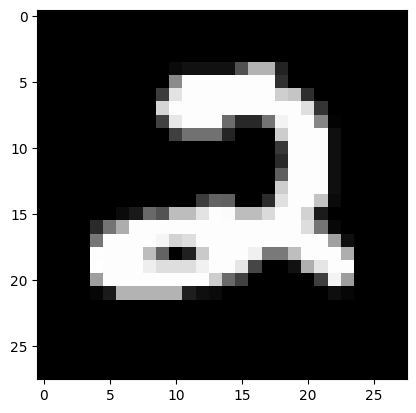

Label: 2.0


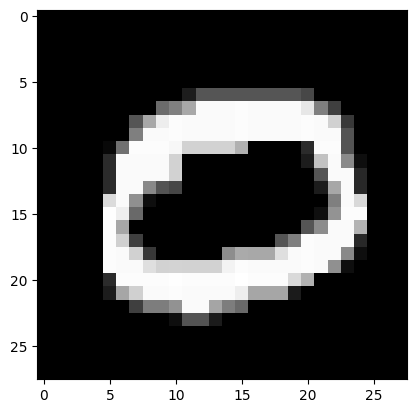

Label: 0.0


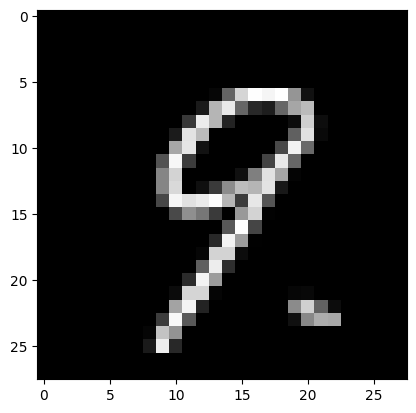

Label: 9.0


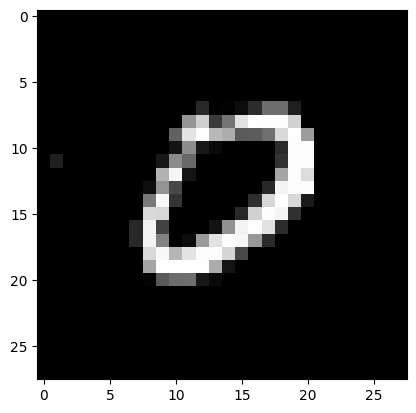

Label: 9.0


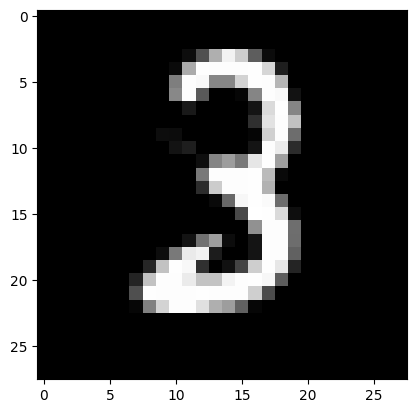

Label: 3.0


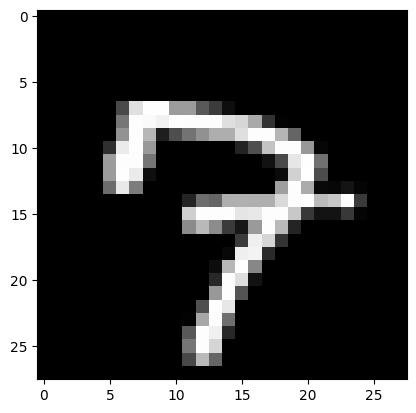

Label: 7.0


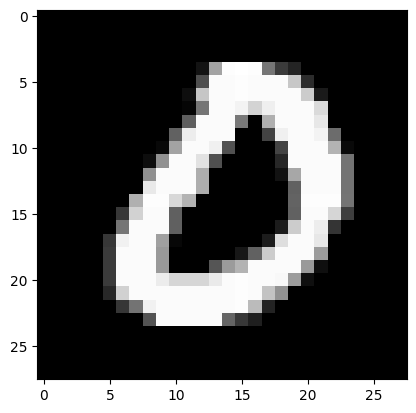

Label: 0.0


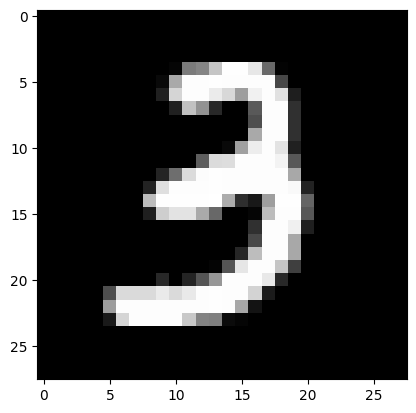

Label: 3.0


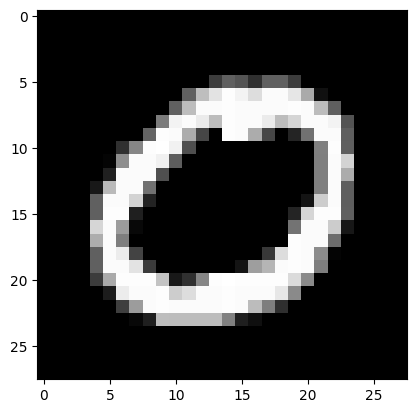

Label: 0.0


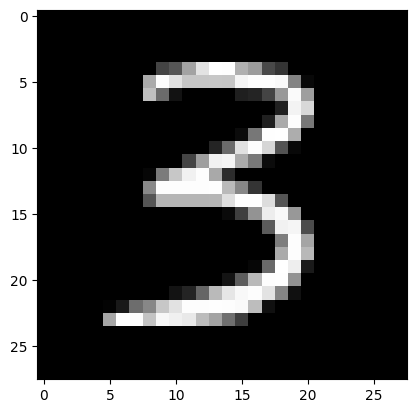

Label: 3.0


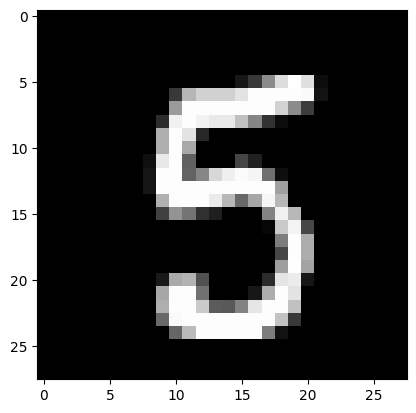

Label: 5.0


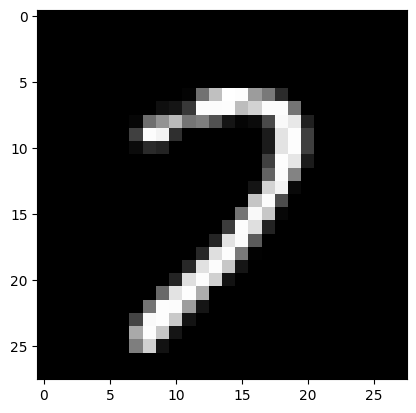

Label: 7.0


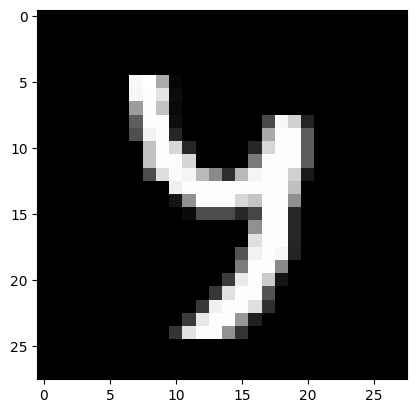

Label: 4.0


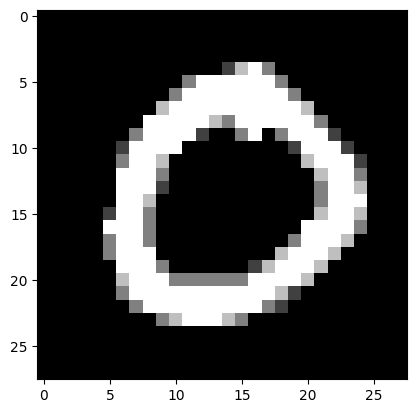

Label: 0.0


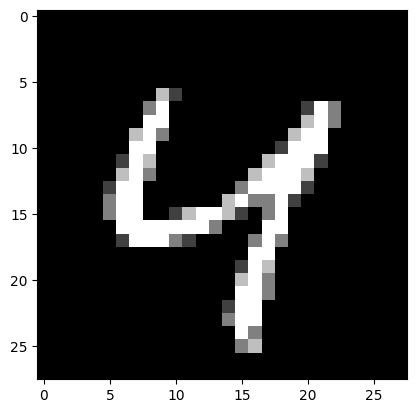

Label: 4.0


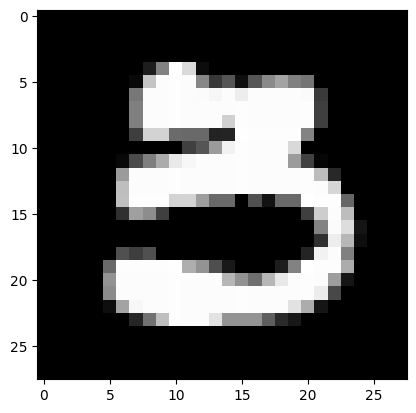

Label: 3.0


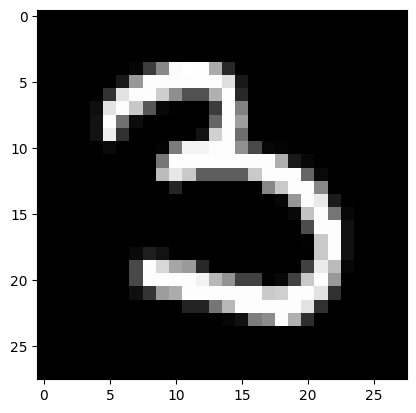

Label: 3.0


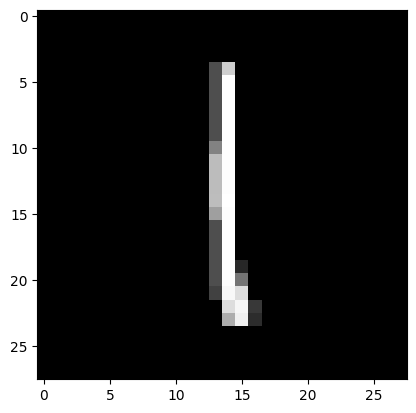

Label: 1.0


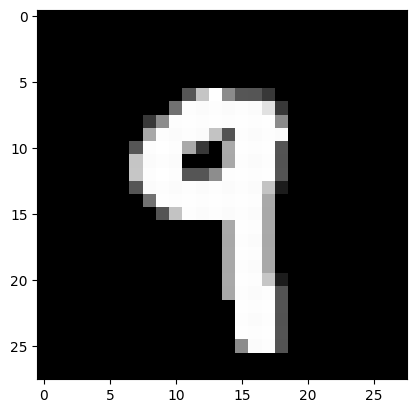

Label: 9.0


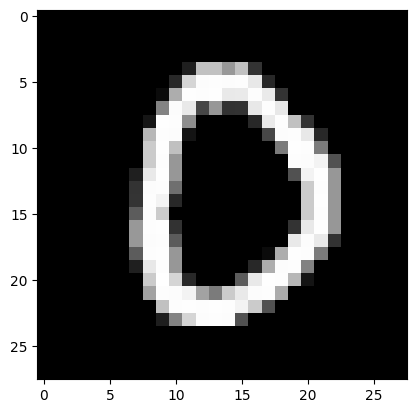

Label: 0.0


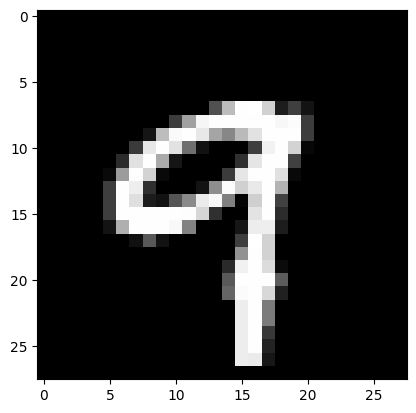

Label: 9.0


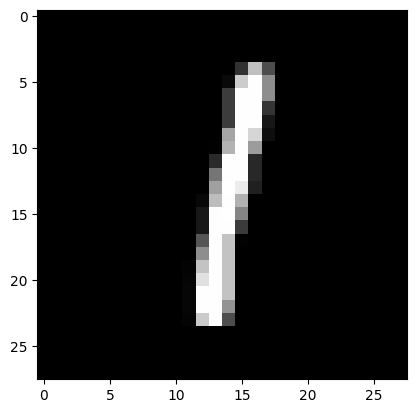

Label: 1.0


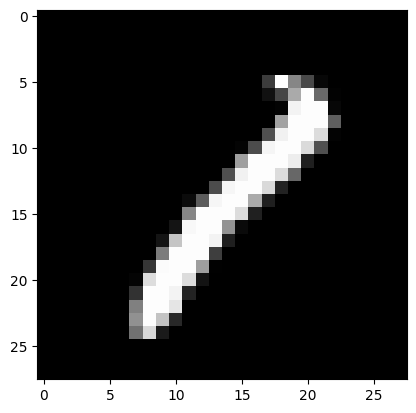

Label: 1.0


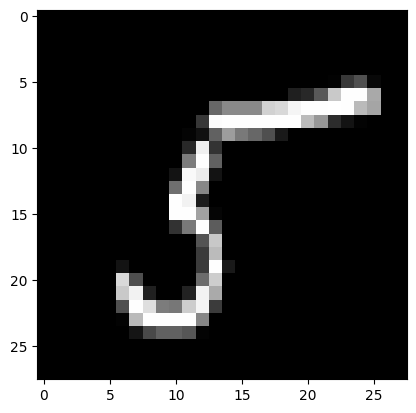

Label: 5.0


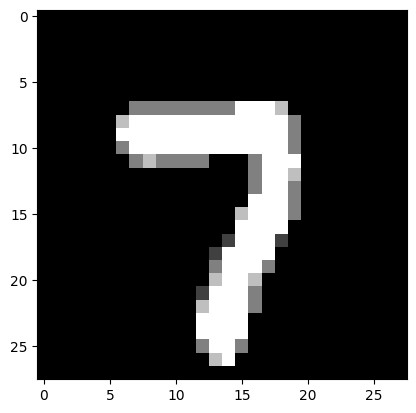

Label: 7.0


In [ ]:
# Load the test dataset
test_df = pd.read_csv("/content/drive/MyDrive/dataset/test.csv") # Read the test CSV file into a DataFrame
test_df.head()  # Display the first few rows of the test dataset

# Prepare the test data
test_data = test_df.values # Convert the DataFrame to a NumPy array
test_images = test_data[:25] # Take the first 25 test images

# Visualize the first 25 test images and predict their labels
for test in test_images:
    im = test.reshape((28,28)) # Reshape the 784-pixel array into a 28x28 matrix
    plt.figure() # Create a new figure
    plt.imshow(im, cmap='gray') # Display the image in grayscale
    plt.show() # Show the plot
    print("Label:", knn(X_train, y_train, test)) # Predict and print the label

**Defining the Model**

In [ ]:
from keras.models import Sequential # Sequential model
from keras.layers import Convolution2D, MaxPooling2D, Dense, Dropout, Flatten # all layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.activations import softmax, relu # activation function
from keras.initializers import VarianceScaling # Layer weight initializers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
# Load dataset
dataset = pd.read_csv("/content/drive/MyDrive/dataset/train.csv")
X = dataset.iloc[:, 1:].values / 255.0  # Normalize
y = to_categorical(dataset.iloc[:, 0].values, num_classes=10)  # One-hot encoding

# Reshape data into 28x28x1 format
X = X.reshape(X.shape[0], 28, 28, 1)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

**Compile Model**

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
# Data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False  # randomly flip images
)

**Fit Model**

In [ ]:
# Train the model with data augmentation
batch_size = 64
epochs = 10
model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
          epochs=epochs, validation_data=(X_val, y_val),
          verbose=1, steps_per_epoch=X_train.shape[0] // batch_size)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


525/525 ━━━━━━━━━━━━━━━━━━━━ 118s 219ms/step - accuracy: 0.7568 - loss: 0.7690 - val_accuracy: 0.9751 - val_loss: 0.0718
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 118s 224ms/step - accuracy: 0.9607 - loss: 0.1305 - val_accuracy: 0.9845 - val_loss: 0.0450
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 138s 216ms/step - accuracy: 0.9700 - loss: 0.0987 - val_accuracy: 0.9881 - val_loss: 0.0395
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 142s 216ms/step - accuracy: 0.9778 - loss: 0.0715 - val_accuracy: 0.9879 - val_loss: 0.0386
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 148s 229ms/step - accuracy: 0.9808 - loss: 0.0636 - val_accuracy: 0.9918 - val_loss: 0.0267
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 116s 221ms/step - accuracy: 0.9816 - loss: 0.0628 - val_accuracy: 0.9942 - val_loss: 0.0166
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 113s 215ms/step - accuracy: 0.9833 - loss: 0.0551 - val_accuracy: 0.9911 - val_loss: 0.0249
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 147s 225ms/step - accuracy: 0.9842 - loss: 0.04

In [ ]:
# Load test dataset and prepare for prediction
test_data = pd.read_csv("/content/drive/MyDrive/dataset/test.csv").values / 255.0

test_data = test_data.reshape(test_data.shape[0], 28, 28, 1)

In [ ]:
# Generate predictions
predictions = model.predict(test_data, batch_size=32)
predicted_labels = np.argmax(predictions, axis=1)


875/875 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step


In [ ]:
# Create submission file
submission = pd.DataFrame({
    "ImageId": np.arange(1, len(predicted_labels) + 1),
    "Label": predicted_labels
})
submission.to_csv("submission.csv", index=False)

In [ ]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['ImageId'].plot(kind='hist', bins=20, title='ImageId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Label'].plot(kind='hist', bins=20, title='Label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='ImageId', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='ImageId', y='Label', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Label']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Label')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ImageId']
  ys = series['Label']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('ImageId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ImageId')
_ = plt.ylabel('Label')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ImageId']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ImageId'}, axis=1)
              .sort_values('ImageId', ascending=True))
  xs = counted['ImageId']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('ImageId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ImageId')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['ImageId'].plot(kind='line', figsize=(8, 4), title='ImageId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Label'].plot(kind='line', figsize=(8, 4), title='Label')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from google.colab import files
files.download("submission.csv")
print("Submission downloaded")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Submission downloaded
